In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
from numpy import *

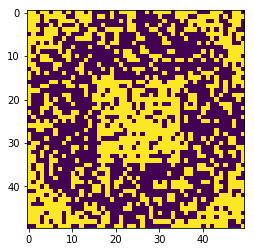

In [32]:
# 初期画像
m1 = 50
m2 = 50
x0 = -ones((m1, m2))
for i in range(m1):
    for j in range(m2):
        di = i-m1//2
        dj = j-m2//2
        if di*di+dj*dj > min(m1//2, m2//2)**2:
            x0[i][j] = 1
        elif -m1/5 < di and m1/5 > di and -m2/5 < dj and m2/5 > dj:
            x0[i][j] = 1
plt.imshow(x0)
gamma = 1

# ノイズを入れる
eps = 0.3
x = x0
for j in range(m1):
    i = where(random.rand(m2) < eps)
    x[j][i] = -x[j][i]
plt.imshow(x)

In [21]:
#必要な関数の定義
def mylogf(x):
    q = 0
    for i in range(m1):
        for j in range(m2):
            vx = [1, 0, -1, 0]
            vy = [0, 1, 0, -1]
            s = 0
            for k in range(4):
                s += x[(i+vx[k])%m1, (j+vy[k])%m2]
            q += x[i, j]*s
    return gamma*q/2